In [102]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [76]:
imgs = glob.glob('./img/*.jpg')

In [77]:
import xml.etree.ElementTree as ET
tree = ET.parse('train.xml')
root = tree.getroot()

In [ ]:
datas = {}
for image in root:
    print(image.tag, image.attrib)
    for info in image:
        print(info.tag,info.attrib,info.text)
        if info.tag == 'imageName':
            datas[info.text]={}
            key = info.text
            
        for taggedRectangles in info:
            print(taggedRectangles.tag,taggedRectangles.attrib)
            for tag in taggedRectangles:
                print(tag.tag,tag.attrib,tag.text)
                if tag.tag == 'tag':
                    print(key,tag.text)
                    datas[key][tag.text] = taggedRectangles.attrib

In [79]:
list(datas.items())[0]

('img/14_03.jpg',
 {'LIVING': {'height': '75', 'width': '236', 'x': '375', 'y': '253'},
  'ROOM': {'height': '76', 'width': '175', 'x': '639', 'y': '272'},
  'THEATERS': {'height': '87', 'width': '281', 'x': '839', 'y': '283'}})

In [106]:
def resize_pad(img, h, w):
    w_new = int(h / img.shape[0] * img.shape[1])
    img = cv2.resize(img, (w_new, h), cv2.INTER_AREA)
    if img.shape[1] >= w: return img[:, :w], w // 16
    padded = np.zeros((h, w, 3)).astype(img.dtype)
    padded[:, :img.shape[1]] = img
    return padded, img.shape[1] // 16

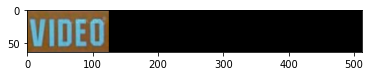

In [108]:
img = cv2.imread(name)
a,b = resize_pad(img[y:y+h,x:x+w],64,512)
plt.imshow(a)

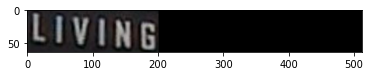

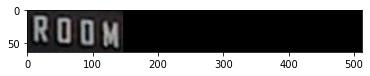

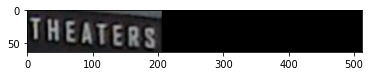

In [126]:
ww=[]
for name,info in datas.items():
    img = cv2.imread(name)
    for tag,roi in info.items():
#         print(tag,roi)
        h = int(roi['height'])
        w = int(roi['width'])
        x = int(roi['x'])
        y = int(roi['y'])
        plt.imshow(resize_pad(img[y:y+h,x:x+w],64,512)[0])
        plt.show()
#         ww.append(w)
    break
    

In [119]:
max(ww)

736

In [120]:
for name,info in datas.items():
    img = cv2.imread(name)
    for tag,roi in info.items():
#         print(tag,roi)
        h = int(roi['height'])
        w = int(roi['width'])
        x = int(roi['x'])
        y = int(roi['y'])
#         plt.imshow(img[y:y+h,x:x+w])
#         plt.show()
#         print('./crop/'+name[4:-4]+tag+'.jpg')
#         plt.imshow(resize_pad(img[y:y+h,x:x+w],64,1024)[0])
        cv2.imwrite('./crop/'+name[4:-4]+tag+'.jpg',resize_pad(img[y:y+h,x:x+w],64,512)[0])
#         cv2.imwrite('./crop/'+name[4:-4]+tag+'.jpg',img[y:y+h,x:x+w])

In [100]:
resize_pad(img[y:y+h,x:x+w],64,512)[0].shape

(64, 512, 3)

In [65]:
cv2.imwrite('./crop/1.jpg',img)

True

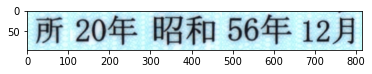

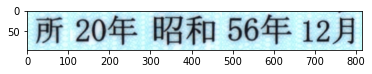

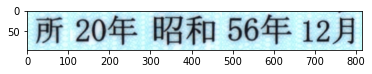

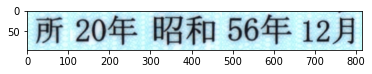

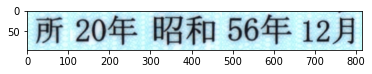

In [125]:
imgs = glob.glob('/datasets/almex_insurance/combined/*.jpg')
for i in imgs[:5]:
    plt.imshow(plt.imread(i))
    plt.show()